In [1]:
import math
import matplotlib.pyplot as plt
import torch
from dir import utils
from dir.models.guided_model import *

from diffusers import DDPMPipeline, DDPMScheduler, DDIMPipeline, DDIMScheduler
from diffusers.optimization import get_scheduler
from omegaconf import OmegaConf

%load_ext autoreload
%autoreload 2

In [2]:
cfg = OmegaConf.load('./configs/models/guided/lsun.yaml')
model = UNetModel(**cfg)
ckpt = torch.load('./pretrained/guided_diffusion/lsun_bedroom.pt')
model.load_state_dict(ckpt, strict=True)
model.sample_size = 256
noise_scheduler = DDPMScheduler(
    num_train_timesteps=1000, 
    variance_type='learned',
    tensor_format="pt",
)
pipeline = DDPMPipeline(
    unet=model,
    scheduler=noise_scheduler,
)

  0%|          | 0/1000 [00:00<?, ?it/s]

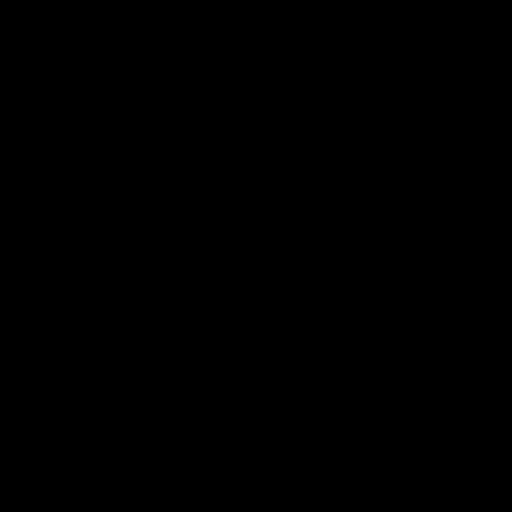

In [3]:
img = pipeline(batch_size=4, output_type="numpy")["sample"]
utils.to_pil_image(utils.make_grid(img, 2))

In [4]:
cfg = OmegaConf.load('./configs/models/guided/lsun.yaml')
model = UNetModel(**cfg)
ckpt = torch.load('./pretrained/guided_diffusion/lsun_bedroom.pt')
model.load_state_dict(ckpt, strict=True)
model.sample_size = 256
noise_scheduler = DDIMScheduler(
    num_train_timesteps=1000, 
    variance_type='learned',
    tensor_format="pt",
)
pipeline = DDPMPipeline(
    unet=model,
    scheduler=noise_scheduler,
)

TypeError: __init__() got an unexpected keyword argument 'variance_type'